# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 5 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно реком
ендуем для генерации выборок использовать именно эту библиотеку.
Каждая задача оценивается в 10 баллов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [2]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [3]:
N = int(1e4)  # use this
THETA = 1

In [4]:
samples = sps.uniform(0, THETA).rvs(N)

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [5]:
def double_sum(samples_average): # несмещенная, состоятельная (!)
    return 2*samples_average

def sum_plus_half_max(samples_average, samples_max): # смещенная, состоятельная 
    return samples_average + samples_max/2

def n_plus_1_min(samples_min): # несмещенная, несостоятельная 
    n_plus_1_array = np.array(range(1,N+1)) + 1
    return n_plus_1_array * samples_min

def max_plus_min(samples_max, samples_min): # несмещенная, состоятельная (!)
    return samples_max + samples_min

def frac_n_plus_1_n_max(samples_max): # несмещенная , состоятельная (!)
    array_1_N = np.array(range(1,N+1))
    frac_n_plus_1_n_array = (array_1_N + 1) / array_1_N
    return frac_n_plus_1_n_array * samples_max

In [6]:
def calc_theta_with_lid(samples):
    "принимает выборку и возвращает посчитанные статистики для различных n"
    samples_average = np.cumsum(samples) / np.array(range(1,N+1))
    samples_max = np.maximum.accumulate(samples)
    samples_min = np.minimum.accumulate(samples)

    theta_with_lid_array = (double_sum(samples_average),
                            sum_plus_half_max(samples_average, samples_max),
                            n_plus_1_min(samples_min),
                            max_plus_min(samples_max, samples_min),
                            frac_n_plus_1_n_max(samples_max))
    return theta_with_lid_array

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

In [7]:
def abs_error(theta_with_lid, theta):
    return abs(theta_with_lid - theta)
def plot(title, xlabel = 'x', ylabel = 'y', 
         xlim_down = 0, xlim_up = N, 
         ylim_down = 0, ylim_up = 1, 
         array_y = [] ,x = [], array_label = [],
         indicator_scatter = False, alpha = 1):
    sns.set(style="darkgrid", font_scale=1.4)
    plt.figure(figsize=(10,8))
    plt.title(title)
    for y, label in zip(array_y, array_label):
        plt.plot(x, y, alpha = alpha, label = label)
        if(indicator_scatter):
            plt.scatter(x, y, alpha = alpha)
    plt.xlim(xlim_down, xlim_up)
    plt.ylim(ylim_down, ylim_up)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [8]:
array_label = [r'$2\overline{X}$', r'$\overline{X} + X_{(n)}/ 2$', 
               r'$(n+1)X_{(1)}$', r'$X_{(1)}+X_{(n)}$', r'$\frac{n+1}{n} X_{(n)}$']

theta_with_lid_array = calc_theta_with_lid(samples)

array_y = [abs_error(theta_with_lid, THETA) for theta_with_lid in theta_with_lid_array ]

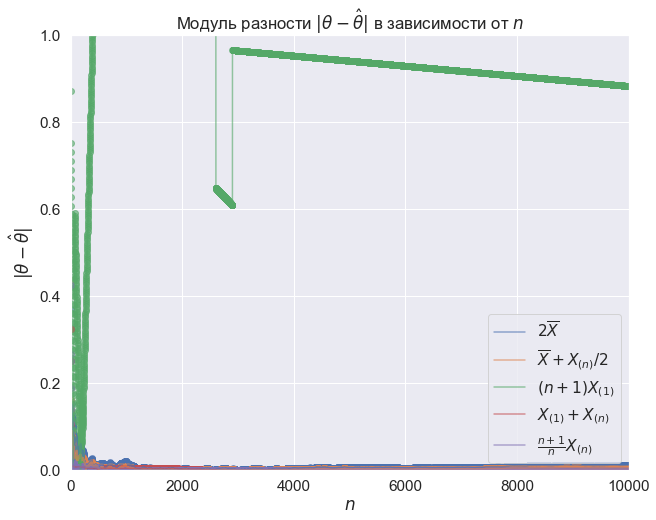

In [9]:
plot(r'Модуль разности $ \|\theta - \hat{\theta} \|$ в зависимости от $n$',r'$n$',r'$ \|\theta - \hat{\theta} \|$',
     array_y = array_y, x = range(N), array_label = array_label, indicator_scatter = True, alpha = 0.6)

Рассмотрим подробней для n = 2000

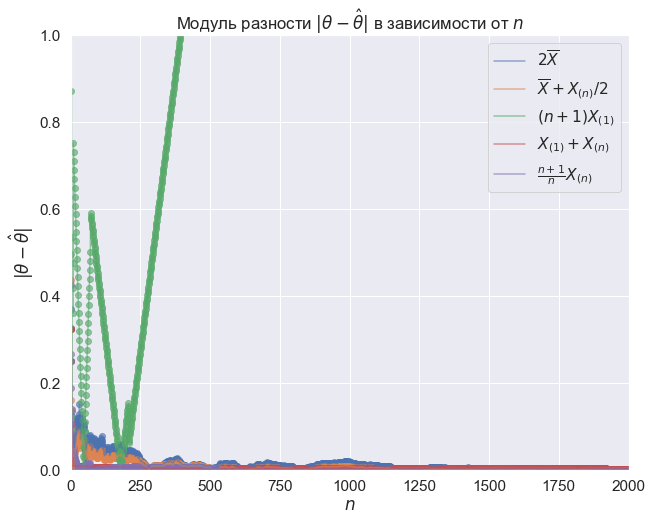

In [10]:
plot(r'Модуль разности $ \|\theta - \hat{\theta} \|$ в зависимости от $n$',r'$n$',r'$ \|\theta - \hat{\theta} \|$',
     xlim_up = 2000, 
     array_y = array_y, x = range(N), array_label = array_label, indicator_scatter = True, alpha = 0.6)

Рассмотрим подробней участок, где $ |\theta - \hat{\theta}| < 0.2 $

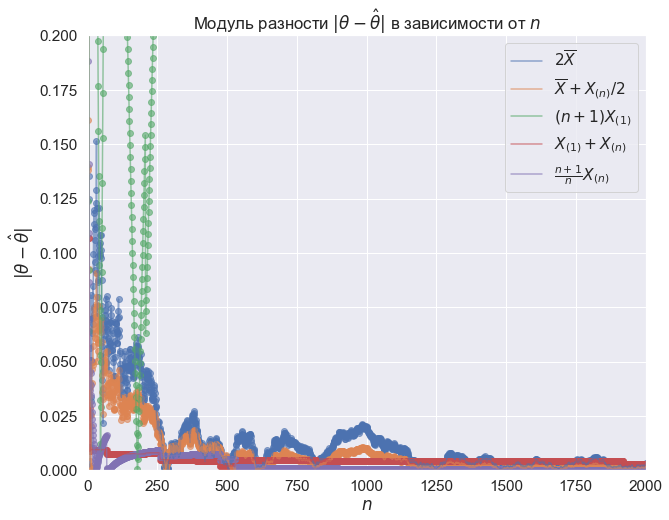

In [11]:
plot(r'Модуль разности $ \|\theta - \hat{\theta} \|$ в зависимости от $n$',r'$n$',r'$ \|\theta - \hat{\theta} \|$',
     xlim_up = 2000, ylim_up = 0.2,
     array_y = array_y, x = range(N), array_label = array_label, indicator_scatter = True, alpha = 0.6)

In [12]:
np.array(array_y)[:, -1]

array([1.16808846e-02, 5.98160567e-03, 8.83640812e-01, 2.70691959e-04,
       1.82354947e-04])

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ 
лучшая оценка $\frac{n+1}{n} X_{(n)}$

Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

In [13]:
def plot_for_different_theta(theta):
    samples = sps.uniform(0, theta).rvs(N)
    theta_with_lid_array = calc_theta_with_lid(samples)
    array_y = [abs_error(theta_with_lid, theta) for theta_with_lid in theta_with_lid_array]
    plot(r'Модуль разности $ \|\theta - \hat{\theta} \|$ в зависимости от $n$',r'$n$',r'$ \|\theta - \hat{\theta} \|$',
         xlim_up = 10000, ylim_up = 0.5,
         array_y = array_y, x = range(N), array_label = array_label,indicator_scatter = True, alpha = 0.6)

$\theta = 2$

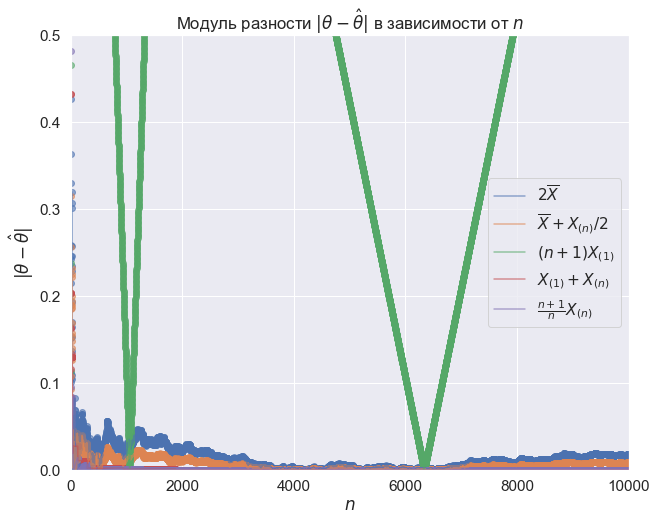

In [14]:
plot_for_different_theta(theta = 2)

$\theta = 5$

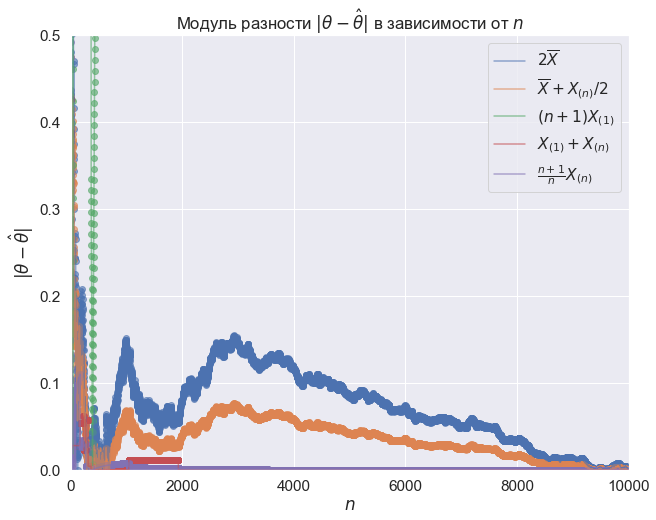

In [15]:
plot_for_different_theta(theta = 5)

$\theta = 20$

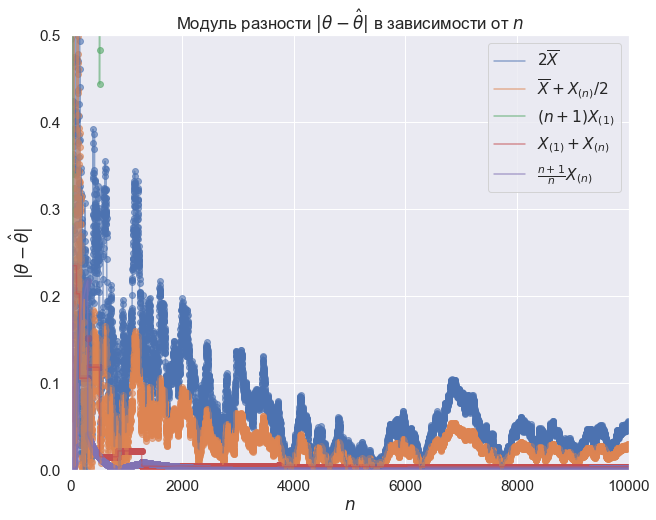

In [16]:
plot_for_different_theta(theta = 20)

Сделайте вывод.


__Вывод:__
из эксперемента видны свойства оценок. Сильно сказывается несостоятельность оценки $(n+1)X_{(1)}$. Так же можно заметить, что лучше всего сходятся оценки $X_{(1)}+X_{(n)}$, $\frac{n+1}{n} X_{(n)}$.

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$. 

$$f_X(x) = e^{-x}$$

In [17]:
samples_exp = sps.expon().rvs(N)

Для всех $n \leqslant N$ посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

In [18]:
def theta_with_lid_exp(samples_exp, k):
    aver_k_moment = (np.cumsum(samples_exp ** k) /  np.array(range(1,N+1)))
    return (np.math.factorial(k)/aver_k_moment) ** 1/k

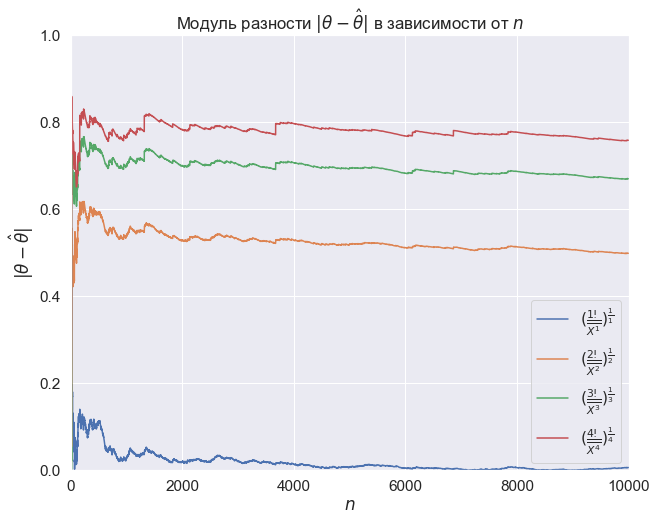

In [19]:
range_k = range(1,5)
theta_with_lid_exp_array = [theta_with_lid_exp(samples_exp, k) for k in range_k]

array_y_exp = [abs_error(theta_with_lid_exp, THETA) for theta_with_lid_exp in theta_with_lid_exp_array ]
array_label_exp = [r"$(\frac{%.0f!}{\overline{X^%.0f}})^\frac{1}{%.0f}$"%(k, k, k) for k in range_k ]
plot(r'Модуль разности $ \|\theta - \hat{\theta} \|$ в зависимости от $n$',r'$n$',r'$ \|\theta - \hat{\theta} \|$',
     xlim_up = N, ylim_up = 1,
     array_y = array_y_exp, x = range(N), array_label = array_label_exp)

Сделайте вывод.


__Вывод:__
По графику видно, что оценка $(\frac{k!}{\overline{X^k}})^\frac{1}{k}$ является смешенной для $k \geqslant 2$. Поэтому оценка ведёт себя лучше всего при $k = 1$.

### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

$$f_X(x) = \frac{5}{x^6}I(x \in [1;\infty)$$

сгенерируем выборку из равномерного распределения, после этого подставим её в обратную функцию :
$$x = (\frac{5}{y})^\frac{1}{6}$$

In [20]:
N = 10000
def my_distribution(samples_x):
    return (5/samples_x ** 6)
def inverse_my_distribution(samples_y):
    return (5/samples_y)**(1/6) 
samples_x = np.sort(inverse_my_distribution(sps.uniform(0, 5).rvs(N)))
samples_y = my_distribution(samples_x)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

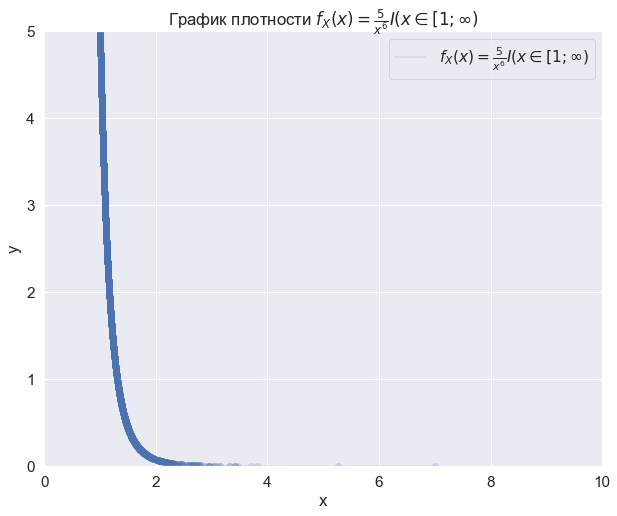

In [21]:
plot(title = r'График плотности $f_X(x) = \frac{5}{x^6}I(x \in [1;\infty)$',
     xlim_down = 0, xlim_up = 10,
     ylim_down = 0, ylim_up = 5,
     array_y = [samples_y],
     x = samples_x , 
     array_label = [r'$f_X(x) = \frac{5}{x^6}I(x \in [1;\infty)$'],indicator_scatter = True, alpha = 0.17)

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

в качестве оценки возьмём несмещенную выборочную дисперсию:
$$S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X} )^2 = \frac{1}{n-1}\sum_{i=1}^n X_i^2 - \frac{1}{n(n-1)}(\sum_{i=1}^n X_i)^2$$

In [22]:
def sample_variance(samples_x):
    array_n = np.array(range(1,N+1))
    array_n[0] = 2
    array_n_minus_1 = array_n - 1
    mean_square = np.cumsum(samples_x ** 2) / array_n_minus_1
    square_average = np.cumsum(samples_x)**2 / (array_n * array_n_minus_1)
    return mean_square - square_average

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

In [23]:
#истинный К-ый момент для моего распределения распределения:
def k_moment(k):
    return 1/(6 - k - 1)
variance  =abs(k_moment(2) - k_moment(1) ** 2)
array_y = abs(variance**2 - sample_variance(samples_x))

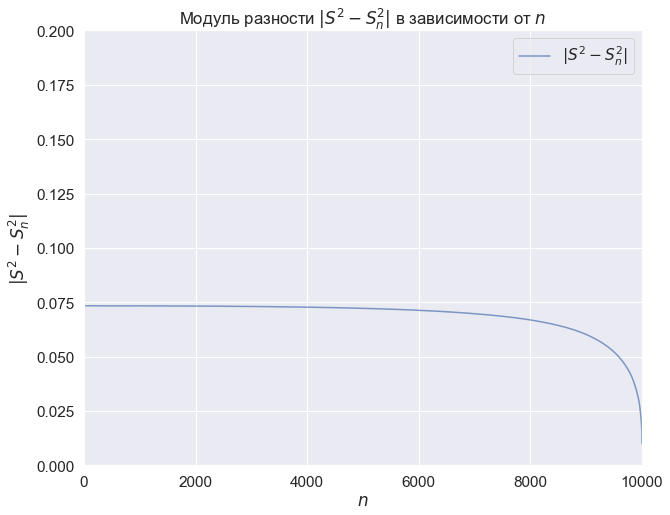

In [24]:

plot(title = r'Модуль разности $ \|S^2 - S_n^2\|$ в зависимости от $n$',
     xlabel = r'$n$',
     ylabel = r'$ \|S^2 - S_n^2 \|$',
     xlim_down = 0, xlim_up = 10000,
     ylim_down = 0, ylim_up = 0.2,
     array_y = [array_y], 
     x = list(range(N)), 
     array_label = [r'$\|S^2 - S_n^2 \|$'],
     indicator_scatter = False, alpha = 0.7)

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


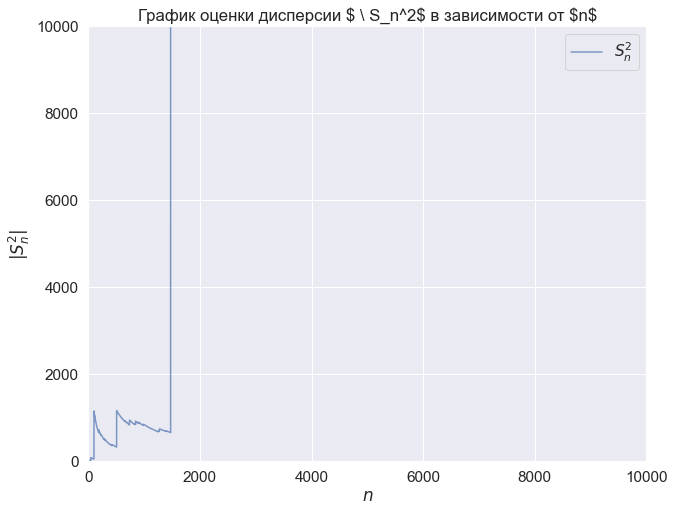

In [46]:
N = 10000

samples_caushy = sps.cauchy().rvs(N)
plot(title = r'График оценки дисперсии $ \ S_n^2\$ в зависимости от $n$',
     xlabel = r'$n$',
     ylabel = r'$ \|S_n^2 \|$',
     xlim_down = 0, xlim_up = N,
     ylim_down = 0, ylim_up = 10000,
     array_y = [sample_variance(samples_caushy)], 
     x = list(range(N)), 
     array_label = [r'$S_n^2$'],
     indicator_scatter = False, alpha = 0.7)

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [26]:
N = 10000
samples_norm = sps.norm().rvs(N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [27]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary
#check next

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

In [28]:
array_n = [10, 25, 50, 100, 1000, 10000]
def plot_true_emper(title , y_emper, y_norm, x, n):
    sns.set(style="darkgrid", font_scale=1.4)
    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.scatter(x, y_emper, alpha = 0.2, label = r'$\hat{F}_{^%.0f}(x)$'%(n))
    plt.plot(x, y_norm, alpha = 0.2, label = r'$F(x)$')
    #plt.xlim(xlim_down, xlim_up)
    #plt.ylim(ylim_down, ylim_up)
    plt.xlabel("x")
    #plt.ylabel(ylabel)
    plt.legend()
    plt.show()

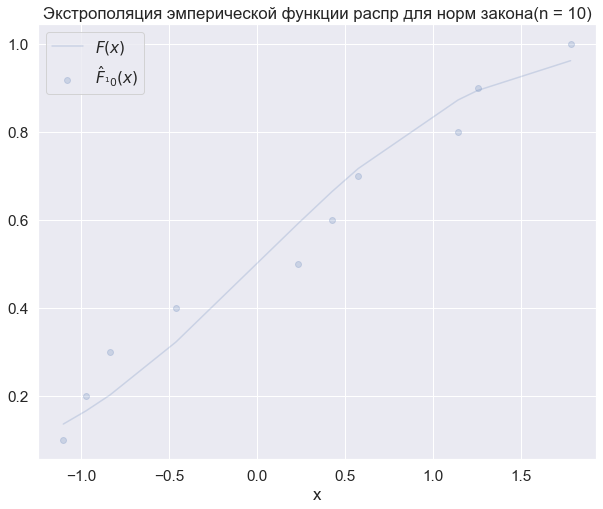

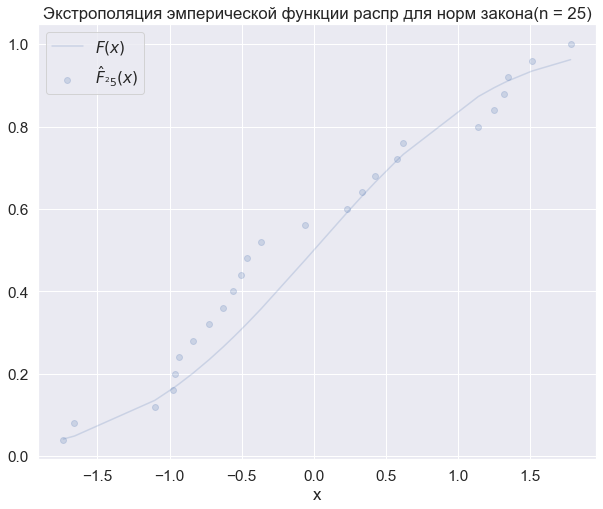

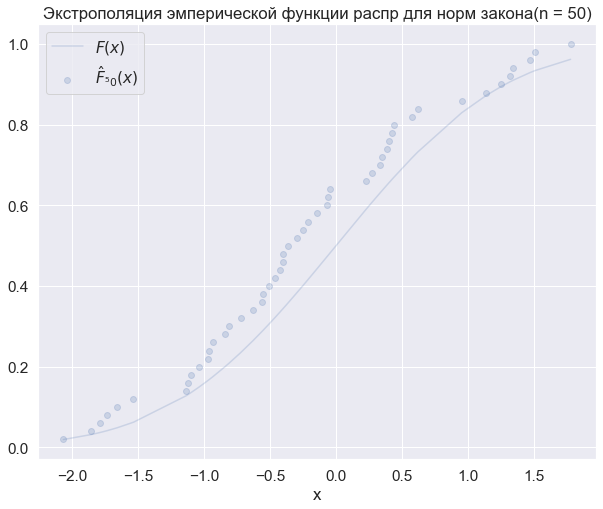

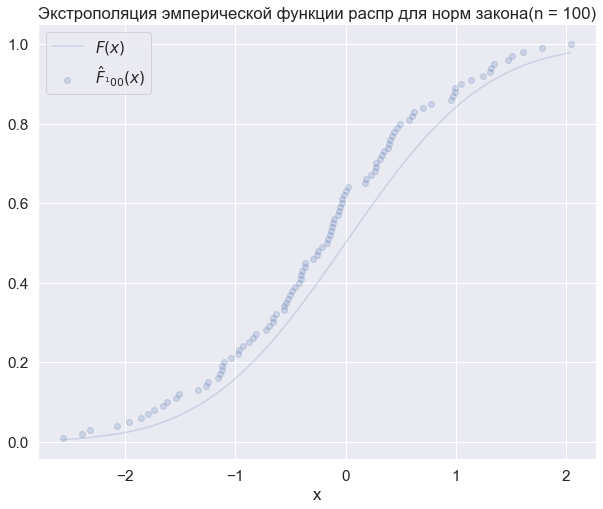

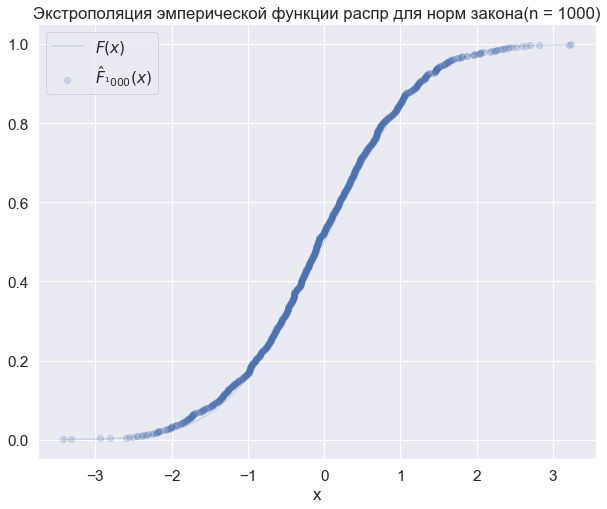

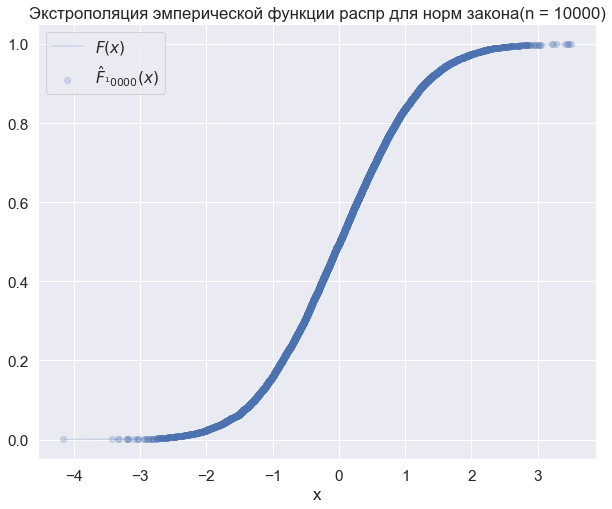

In [29]:
for n in array_n:
    x_n = np.sort(samples_norm[0:n])
    sns.set(style="darkgrid", font_scale=1.4)
    plt.figure(figsize=(10,8))
    plt.title('Экстрополяция эмперической функции распр для норм закона(n = %.0f)'%(n))
    plt.scatter(x_n, ECDF(x_n)(x_n), alpha = 0.2, label = r'$\hat{F}_{^%.0f}(x)$'%(n))
    plt.plot(x_n, sps.norm.cdf(x_n), alpha = 0.2, label = r'$F(x)$')
    plt.xlabel("x")
    plt.legend()
    plt.show()

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


In [30]:
#переписать
D_n = []
for n in range(1,N+1):
    x_n = np.sort(samples_norm[0:n])
    D_n.append(np.max(abs(ECDF(x_n)(x_n) - sps.norm.cdf(x_n))))
D_n = np.array(D_n)
sqrt_n_D_n = (np.array(range(1,N+1)) ** 1/2) * D_n

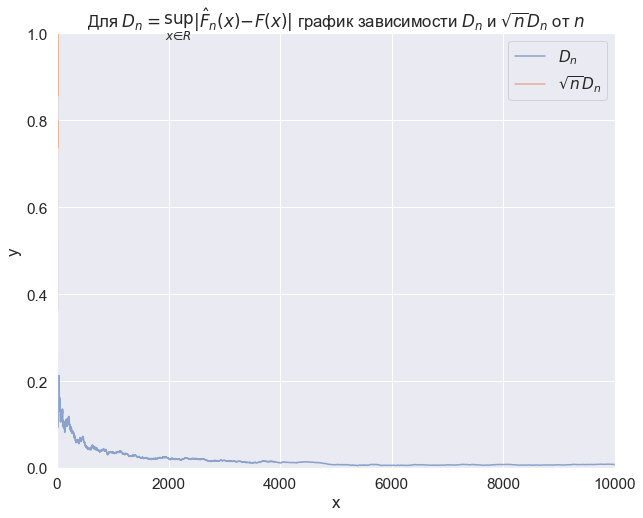

In [31]:
plot(title = r'Для $D_n=\sup_{x∈R} | \hat{F}_n(x)−F(x)|$ график зависимости $D_n$ и $\sqrt{n}D_n$ от $n$',
     xlabel = 'x', ylabel = 'y', 
     xlim_down = 0, xlim_up = N, 
     ylim_down = 0, ylim_up = 1, 
     array_y = [D_n, sqrt_n_D_n] ,x = list(range(1,N+1)), 
     array_label = [r'$D_n$', r'$\sqrt{n}D_n$'],
     alpha = 0.6)

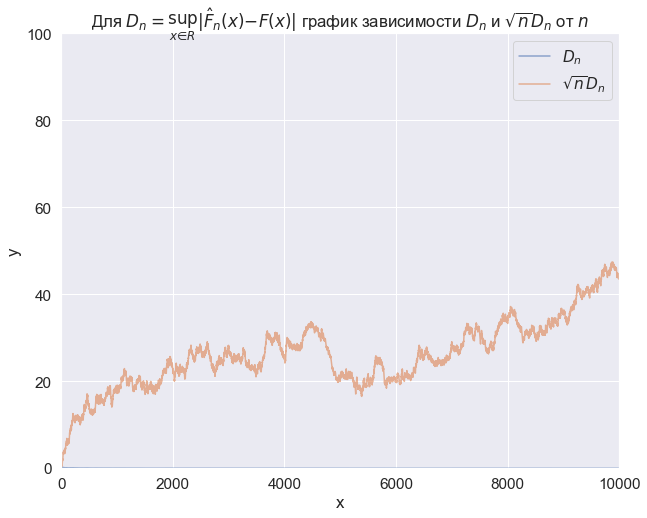

In [33]:
plot(title = r'Для $D_n=\sup_{x∈R} | \hat{F}_n(x)−F(x)|$ график зависимости $D_n$ и $\sqrt{n}D_n$ от $n$',
     xlabel = 'x', ylabel = 'y', 
     xlim_down = 0, xlim_up = N, 
     ylim_down = 0, ylim_up = 100, 
     array_y = [D_n, sqrt_n_D_n] ,x = list(range(1,N+1)), 
     array_label = [r'$D_n$', r'$\sqrt{n}D_n$'],
     alpha = 0.6)

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [34]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

array_samples_uniform = [sps.uniform().rvs(N) for i in range(1,N_samples+1)]
array_double_aver =  np.array([calc_theta_with_lid(samples_uniform)[0][N-1] for samples_uniform in array_samples_uniform])
array_frac_n_plus_1_n_max = np.array([calc_theta_with_lid(samples_uniform)[4][N-1] for samples_uniform in array_samples_uniform])

In [35]:
def hist(title, array_x, bins, alpha, array_label):
    sns.set(style="whitegrid", font_scale=1.4)
    plt.figure(figsize=(10,8))
    plt.title(title)
    for x, label in zip(array_x, array_label):
        plt.hist(x, bins = bins, label = label, alpha = 0.6)
    plt.legend()
    plt.show()

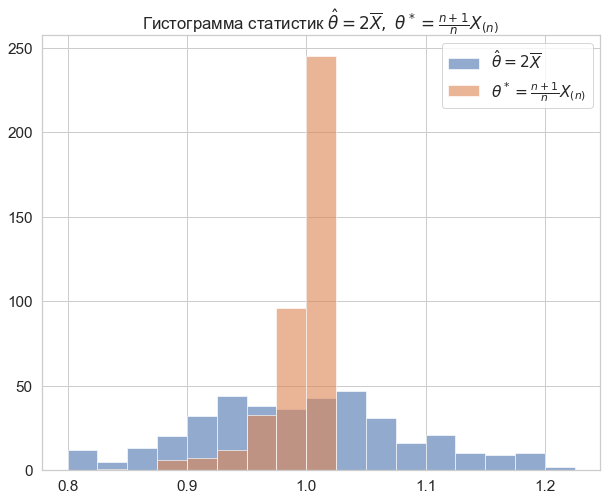

In [36]:
hist(title = r'Гистограмма статистик $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$ ',
     array_x = [array_double_aver, array_frac_n_plus_1_n_max],
     array_label = [r'$\hat\theta = 2\overline{X}$', r'$\theta^* = \frac{n+1}{n} X_{(n)}$'],
     bins = bins,
     alpha = 0.6)

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

In [37]:
def sqrt_n_def(array_double_aver):
    array_n = np.array(range(1,N+1))
    return (N ** 1/2 ) * (array_double_aver - THETA)
def one_minus_n_def(array_frac_n_plus_1_n_max):
    return 1 - N*(array_frac_n_plus_1_n_max - THETA)

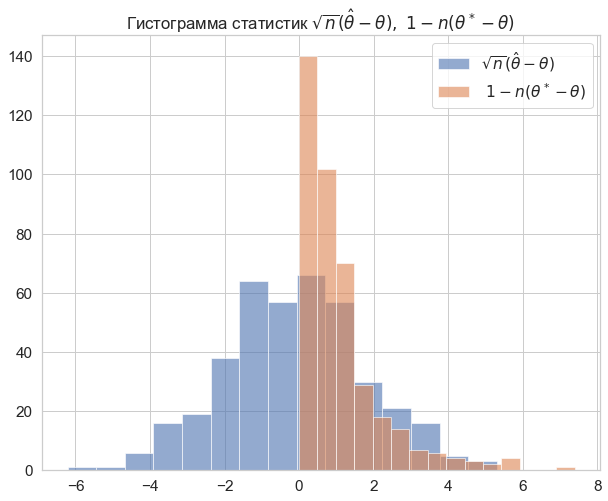

In [38]:
hist(title = r'Гистограмма статистик $\sqrt{n} (\hat\theta - \theta), \ 1 - n  (\theta^* - \theta)$ ',
     array_x = [sqrt_n_def(array_double_aver), one_minus_n_def(array_frac_n_plus_1_n_max)],
     array_label = [r'$\sqrt{n} (\hat\theta - \theta)$', r'$\ 1 - n  (\theta^* - \theta)$'],
     bins = 15,
     alpha = 0.6)

На какие распределения похожи получившиеся гистограммы?

**Ответ:** Оценка $\sqrt{n} (\hat\theta - \theta)$ похоже на нормальное распределение, а $\ 1 - n  (\theta^* - \theta)$ на экспоненциальное.

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{D(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: в силу ЦПТ получаем, что $\sqrt{D(\theta)}\ =\ \frac{\theta}{\sqrt(3)}$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{D(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

<ipython-input-39-af09d166ddfd>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


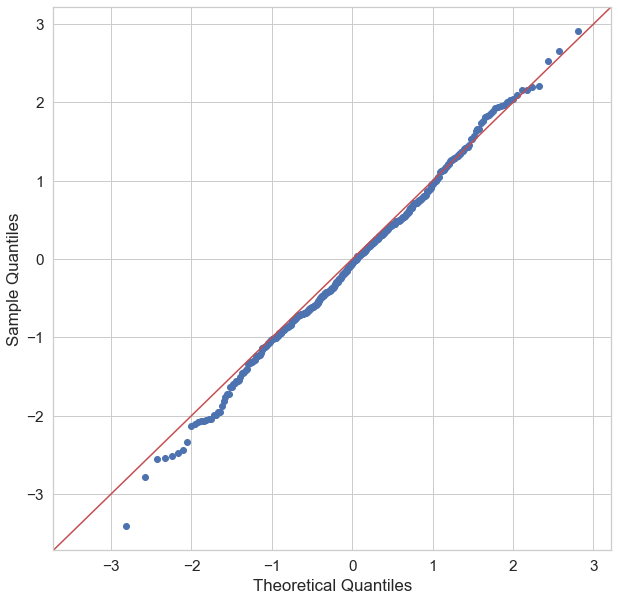

In [39]:
import statsmodels.api as sm


theta_norm = pow(120,0.5)*(array_double_aver - THETA)
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** да, можно.

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** как видно ниже и было замечено сверху на граффике подходит экспоненциальное распределение.

<ipython-input-40-e96e195c3261>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


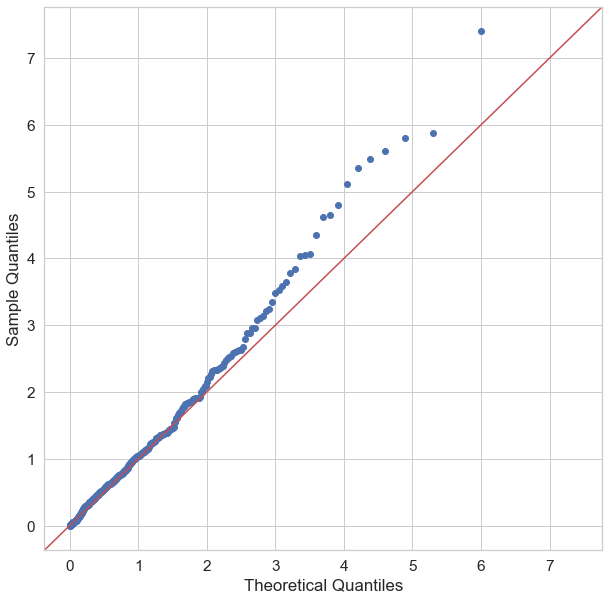

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(one_minus_n_def(array_frac_n_plus_1_n_max), dist = sps.expon, line='45', ax=ax)
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** выгоднее выбрать $\frac{n+1}{n}X_n$, так как эмперически видно, что она сходится быстрее.

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.